![tutorial banner](images/PVLib_PVPMCLogo.PNG)


# PVPMC Problem Based Learning


### Goal: Model energy loss due to high wind stowing.


This is just one quick example of solution, there are other ways to achieve this!

In [12]:
import pvlib
import pandas as pd  # for data wrangling
import matplotlib.pyplot as plt  # for visualization
import pathlib  # for finding the example dataset
import os

print(pvlib.__version__)

0.9.0


In [14]:
# during the live tutorial, we've stored a dedicated key on our server
NREL_API_KEY=None

if NREL_API_KEY is None:
    try:
        NREL_API_KEY = os.environ['NREL_API_KEY']  # get dedicated key for tutorial from servier
    except KeyError:
        NREL_API_KEY = 'DEMO_KEY'  # OK for this demo, but better to get your own key

In [15]:
Dodge_Kansas, metadata = pvlib.iotools.get_psm3(
    latitude=37.7528, longitude=-100.017,
    api_key=NREL_API_KEY,
    email='mark.mikofski@dnv.com',  # <-- any email works here fine
    names='tmy')

metadata

{'Source': 'NSRDB',
 'Location ID': '615057',
 'City': '-',
 'State': '-',
 'Country': '-',
 'Latitude': 37.77,
 'Longitude': -100.02,
 'Time Zone': -6,
 'Elevation': 794,
 'Local Time Zone': -6,
 'Dew Point Units': 'c',
 'DHI Units': 'w/m2',
 'DNI Units': 'w/m2',
 'GHI Units': 'w/m2',
 'Temperature Units': 'c',
 'Pressure Units': 'mbar',
 'Wind Direction Units': 'Degrees',
 'Wind Speed Units': 'm/s',
 'Surface Albedo Units': 'N/A',
 'Version': '3.2.0'}

In [45]:
location = pvlib.location.Location(latitude=metadata['Latitude'],
                                   longitude=metadata['Longitude'])

times = df_tmy.index - pd.Timedelta('30min')
solar_position = location.get_solarposition(times)
solar_position.index += pd.Timedelta('30min')


In [79]:
tracking_angles = pvlib.tracking.singleaxis(
    apparent_zenith=solar_position['apparent_zenith'],
    apparent_azimuth=solar_position['azimuth'],
    axis_tilt=0,
    axis_azimuth=0,
    max_angle=50,
    backtrack=True,  # for true-tracking
    gcr=0.5)  # irrelevant for true-tracking


In [47]:
tracking_angles

,tracker_theta,aoi,surface_azimuth,surface_tilt
1990-01-01 01:00:00-05:00,NaN,NaN,NaN,NaN
1990-01-01 02:00:00-05:00,NaN,NaN,NaN,NaN
1990-01-01 03:00:00-05:00,NaN,NaN,NaN,NaN
1990-01-01 04:00:00-05:00,NaN,NaN,NaN,NaN
1990-01-01 05:00:00-05:00,NaN,NaN,NaN,NaN
...,...,...,...,...
1990-12-31 20:00:00-05:00,NaN,NaN,NaN,NaN
1990-12-31 21:00:00-05:00,NaN,NaN,NaN,NaN
1990-12-31 22:00:00-05:00,NaN,NaN,NaN,NaN
1990-12-31 23:00:00-05:00,NaN,NaN,NaN,NaN


In [52]:
stowing_angle=0

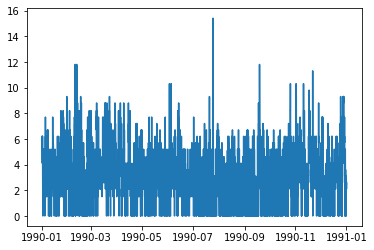

In [56]:
plt.plot(df_tmy['Wspd'])#

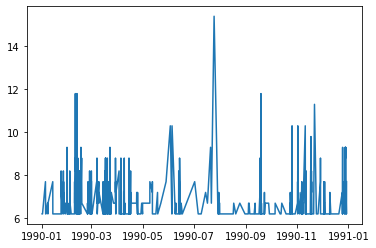

In [60]:
plt.plot(df_tmy[df_tmy['Wspd']>6]['Wspd'])

In [63]:
tracking_angles[df_tmy['Wspd']>6]

,tracker_theta,aoi,surface_azimuth,surface_tilt
1990-01-01 01:00:00-05:00,NaN,NaN,NaN,NaN
1990-01-01 11:00:00-05:00,22.497707,60.686921,90.0,22.497707
1990-01-04 23:00:00-05:00,NaN,NaN,NaN,NaN
1990-01-05 04:00:00-05:00,NaN,NaN,NaN,NaN
1990-01-05 11:00:00-05:00,22.324744,60.567332,90.0,22.324744
...,...,...,...,...
1990-12-28 22:00:00-05:00,NaN,NaN,NaN,NaN
1990-12-28 23:00:00-05:00,NaN,NaN,NaN,NaN
1990-12-29 00:00:00-05:00,NaN,NaN,NaN,NaN
1990-12-29 12:00:00-05:00,50.000000,51.658480,90.0,50.000000


In [80]:
smart_trackingdata=tracking_angles.copy()


In [81]:
import numpy as np

In [106]:
smart_trackingdata['tracker_theta'] = np.where(df_tmy['Wspd'] > 3, 0, smart_trackingdata['tracker_theta'])

In [83]:
#tracking_angles.iloc[df_tmy['Wspd']>6]['tracker_theta']=0

In [84]:
tracking_angles[df_tmy['Wspd']>6]['tracker_theta']

1990-01-01 01:00:00-05:00          NaN
1990-01-01 11:00:00-05:00    22.497707
1990-01-04 23:00:00-05:00          NaN
1990-01-05 04:00:00-05:00          NaN
1990-01-05 11:00:00-05:00    22.324744
                               ...    
1990-12-28 22:00:00-05:00          NaN
1990-12-28 23:00:00-05:00          NaN
1990-12-29 00:00:00-05:00          NaN
1990-12-29 12:00:00-05:00    50.000000
1990-12-29 14:00:00-05:00     5.749148
Name: tracker_theta, Length: 650, dtype: float64

In [85]:
smart_trackingdata[df_tmy['Wspd']>6]['tracker_theta']

1990-01-01 01:00:00-05:00    0.0
1990-01-01 11:00:00-05:00    0.0
1990-01-04 23:00:00-05:00    0.0
1990-01-05 04:00:00-05:00    0.0
1990-01-05 11:00:00-05:00    0.0
                            ... 
1990-12-28 22:00:00-05:00    0.0
1990-12-28 23:00:00-05:00    0.0
1990-12-29 00:00:00-05:00    0.0
1990-12-29 12:00:00-05:00    0.0
1990-12-29 14:00:00-05:00    0.0
Name: tracker_theta, Length: 650, dtype: float64

In [53]:
df_tmy.keys()

Index(['Date (MM/DD/YYYY)', 'Time (HH:MM)', 'ETR', 'ETRN', 'GHI', 'GHISource',
       'GHIUncertainty', 'DNI', 'DNISource', 'DNIUncertainty', 'DHI',
       'DHISource', 'DHIUncertainty', 'GHillum', 'GHillumSource',
       'GHillumUncertainty', 'DNillum', 'DNillumSource', 'DNillumUncertainty',
       'DHillum', 'DHillumSource', 'DHillumUncertainty', 'Zenithlum',
       'ZenithlumSource', 'ZenithlumUncertainty', 'TotCld', 'TotCldSource',
       'TotCldUncertainty', 'OpqCld', 'OpqCldSource', 'OpqCldUncertainty',
       'DryBulb', 'DryBulbSource', 'DryBulbUncertainty', 'DewPoint',
       'DewPointSource', 'DewPointUncertainty', 'RHum', 'RHumSource',
       'RHumUncertainty', 'Pressure', 'PressureSource', 'PressureUncertainty',
       'Wdir', 'WdirSource', 'WdirUncertainty', 'Wspd', 'WspdSource',
       'WspdUncertainty', 'Hvis', 'HvisSource', 'HvisUncertainty', 'CeilHgt',
       'CeilHgtSource', 'CeilHgtUncertainty', 'Pwat', 'PwatSource',
       'PwatUncertainty', 'AOD', 'AODSource', 'AODU

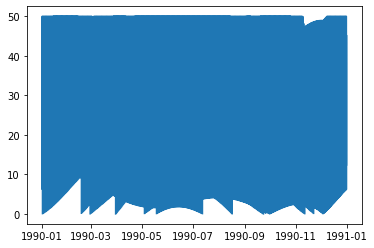

In [86]:
plt.plot(smart_trackingdata['surface_tilt'])

In [101]:
parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_polymer']
cell_temperature = pvlib.temperature.sapm_cell(array_poa,
                                               df_tmy['DryBulb'],
                                               df_tmy['Wspd'],
                                               **parameters)

In [102]:
array_poa = pvlib.irradiance.get_total_irradiance(surface_tilt=tracking_angles['tracker_theta'],
                                                       surface_azimuth=tracking_angles['surface_azimuth'],
                                                       dni=df_tmy['DNI'],
                                                       ghi=df_tmy['GHI'],
                                                       dhi=df_tmy['DHI'],
                                                       solar_zenith=solar_position['apparent_zenith'],
                                                       solar_azimuth=solar_position['azimuth'])
array_poa = array_poa['poa_global']  # Returns various irradiances; we will use the global value at plane of array.

parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_polymer']
cell_temperature = pvlib.temperature.sapm_cell(array_poa,
                                               df_tmy['DryBulb'],
                                               df_tmy['Wspd'],
                                               **parameters)

gamma_pdc = -0.004  # divide by 100 to go from %/°C to 1/°C
nameplate = 1000 # Watts

array_power = pvlib.pvsystem.pvwatts_dc(array_poa, cell_temperature, nameplate, gamma_pdc)


In [103]:
array_poa2 = pvlib.irradiance.get_total_irradiance(surface_tilt=smart_trackingdata['tracker_theta'],
                                                       surface_azimuth=smart_trackingdata['surface_azimuth'],
                                                       dni=df_tmy['DNI'],
                                                       ghi=df_tmy['GHI'],
                                                       dhi=df_tmy['DHI'],
                                                       solar_zenith=solar_position['apparent_zenith'],
                                                       solar_azimuth=solar_position['azimuth'])
array_poa2 = array_poa2['poa_global']  # Returns various irradiances; we will use the global value at plane of array.


gamma_pdc = -0.004  # divide by 100 to go from %/°C to 1/°C
nameplate = 1000 # Watts


parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_polymer']
cell_temperature2 = pvlib.temperature.sapm_cell(array_poa2,
                                               df_tmy['DryBulb'],
                                               df_tmy['Wspd'],
                                               **parameters)



array_power2 = pvlib.pvsystem.pvwatts_dc(array_poa2, cell_temperature2, nameplate, gamma_pdc)


In [110]:
(array_power2.sum()-array_power.sum())*100/array_power.sum()

-0.3747064389180358